In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np 
%matplotlib inline 


In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)


In [4]:
X.shape

(1000, 2)

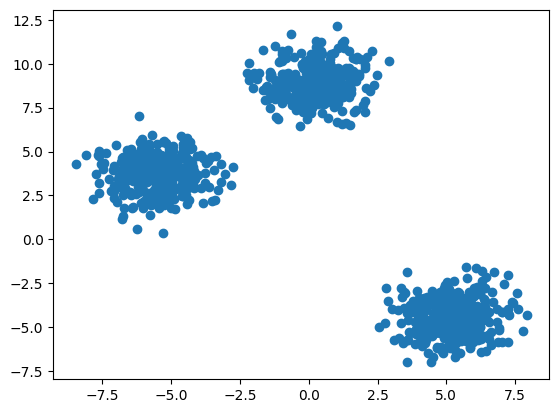

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.33,random_state=42
)

In [7]:
from sklearn.cluster import KMeans

In [8]:
##Elbow Process
##Elbow Method to select the K value 


In [9]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')

In [10]:
kmeans.fit(X_train)
wcss.append(kmeans.inertia_)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
wcss

[533.0042405119186]

In [12]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [13]:
y_labels=kmeans.fit_predict(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


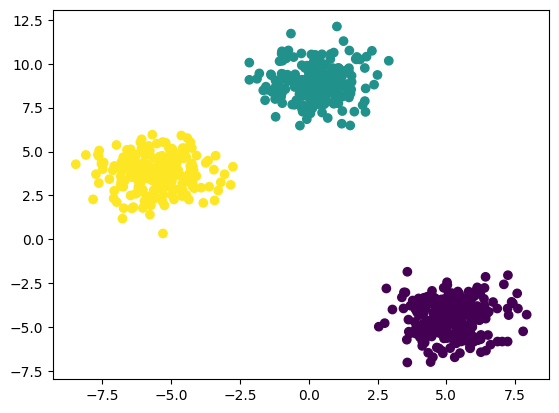

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 1. Load example dataset
iris = load_iris()
X = iris.data
y = iris.target   # true labels (for evaluation only, not used in KMeans)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize KMeans
k_means = KMeans(n_clusters=3, random_state=42)

# 4. Fit on training data
k_means.fit(X_train)

# 5. Predict labels
y_train_label = k_means.predict(X_train)
y_test_label = k_means.predict(X_test)

print("Cluster labels for test set:", y_test_label)


Cluster labels for test set: [0 1 2 0 0 1 0 2 0 0 2 1 1 1 1 0 2 0 0 2 1 0 1 2 2 2 2 2 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 0 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


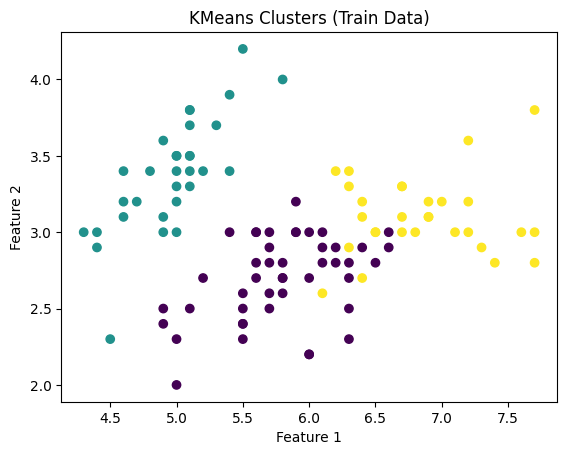

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_label, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clusters (Train Data)")
plt.show()


In [17]:
##knee locator::

!pip install kneed

In [18]:
from kneed import KneeLocator


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 3


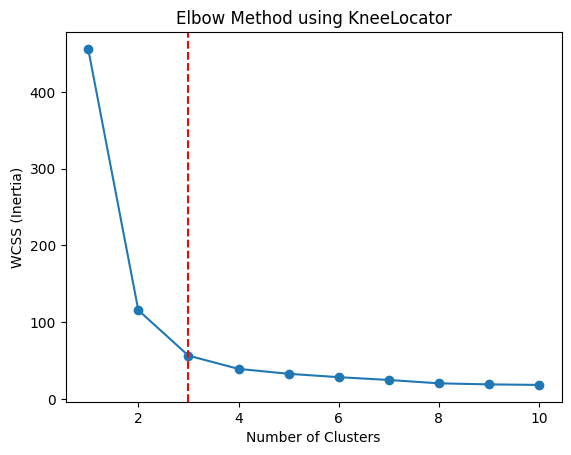

In [19]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Step 1: Compute WCSS (within-cluster sum of squares)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Step 2: Use KneeLocator
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

print("Optimal number of clusters:", knee.knee)

# Step 3: Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method using KneeLocator")
plt.axvline(x=knee.knee, color='red', linestyle='--')  # mark the elbow
plt.show()


In [20]:
##performance metrics 
## silhoutte score
from sklearn.metrics import silhouette_score


In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_coefficients = []

# Notice range starts from 2 (since silhouette is undefined for k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6555447317248047, 0.5435486592889898, 0.4954092166368599, 0.47494651332164606, 0.35530164506794204, 0.3287686768129406, 0.3535005288529958, 0.3359390752424361, 0.32502004754330566]


In [22]:
silhouette_coefficients

[0.6555447317248047,
 0.5435486592889898,
 0.4954092166368599,
 0.47494651332164606,
 0.35530164506794204,
 0.3287686768129406,
 0.3535005288529958,
 0.3359390752424361,
 0.32502004754330566]

In [23]:
##hirarchial-clustering::


In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets


In [25]:
iris =datasets.load_iris()

In [26]:
iris_data=pd.DataFrame(iris.data)

In [27]:
iris_data.columns=iris.feature_names

In [28]:
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_scaled=scaler.fit_transform(iris_data)

In [31]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [32]:
X_scaled.shape

(150, 4)

In [33]:

##apply the pca


In [34]:
from sklearn.decomposition import PCA


In [35]:
pca=PCA(n_components=2)

In [36]:
pca_scaled=pca.fit_transform(X_scaled)

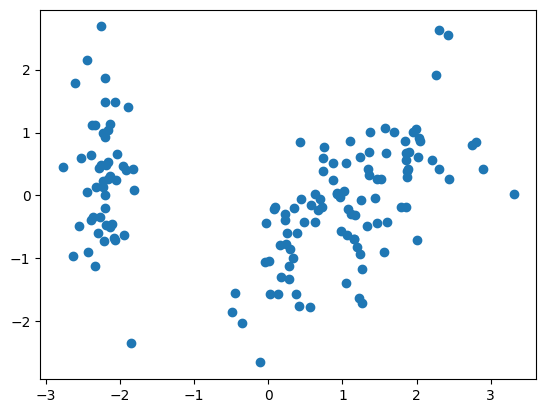

In [37]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])


Text(0.5, 1.0, 'dendograms')

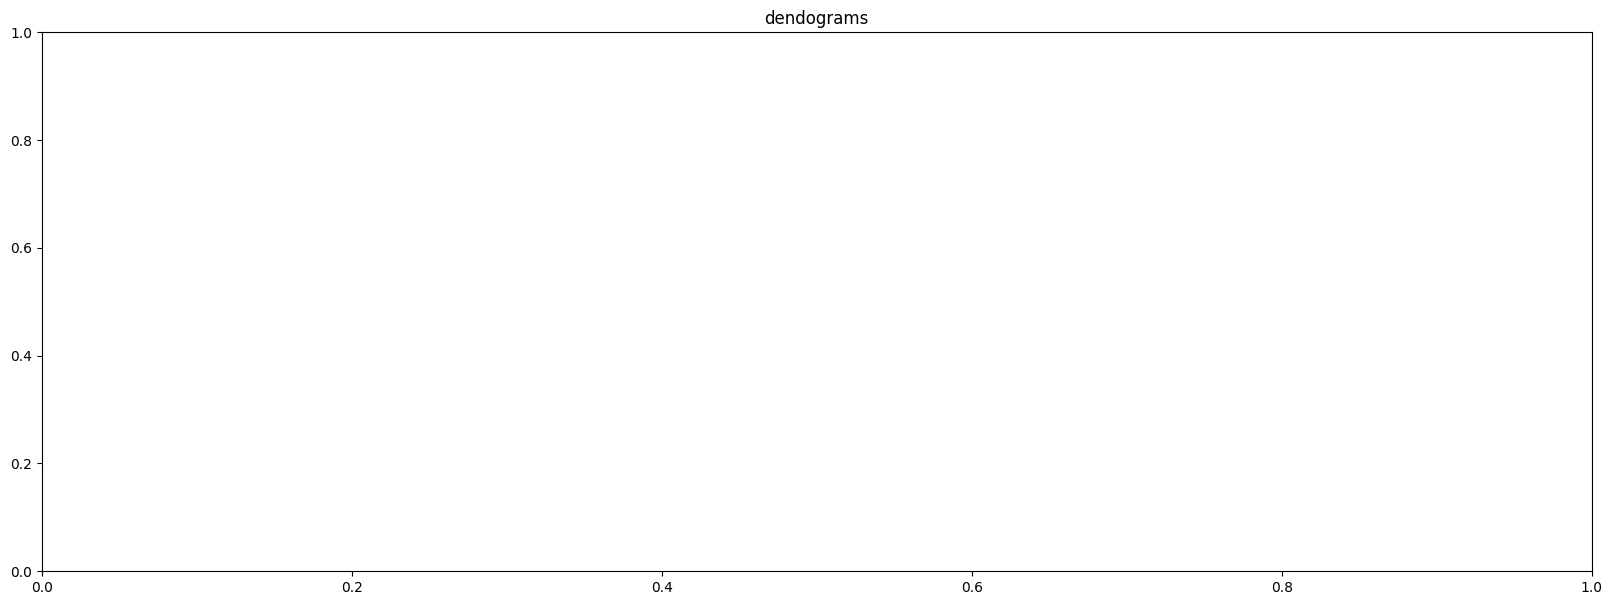

In [38]:
##aglomerative-clustering 
##to construct dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("dendograms")


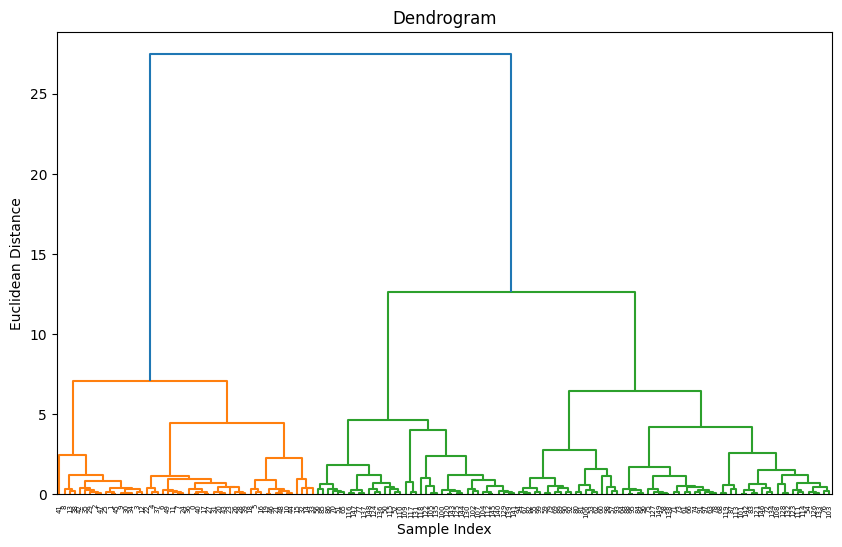

In [39]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
linkage_matrix = sch.linkage(pca_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


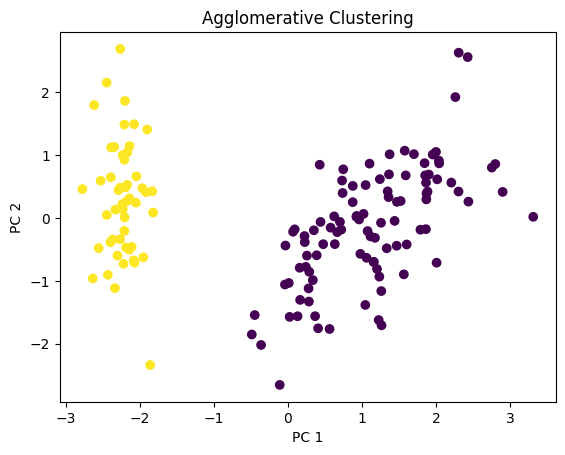

In [40]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create the model
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')

# Fit
cluster.fit(pca_scaled)

# Cluster labels
print(cluster.labels_)

# Scatter plot
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()



In [41]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhouette_coefficients.append(score)
    


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be